In [64]:
import pandas as pd
import sys
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from tqdm import tqdm

In [39]:
df = pd.read_csv(
    "./data/data_reduced.csv",
    usecols={
        "dateid",
        "platform",
        "gamemode",
        "mapname",
        "matchid",
        "roundnumber",
        "objectivelocation",
        "winrole",
        "endroundreason",
        "roundduration",
        "clearancelevel",
        "skillrank",
        "role",
        "team",
        "haswon",
        "operator",
        "nbkills",
        "isdead"
    },
    dtype={
        # "dateid": "int64",
        "platform": "category",
        "gamemode": "category",
        "mapname": "category",
        "matchid": "int64",
        "roundnumber": "int64",
        "objectivelocation": "category",
        "winrole": "category",
        "endroundreason": "category",
        "roundduration": "int64",
        "clearancelevel": "int64",
        "skillrank": "category",
        "role": "category",
        "team": "int64",
        "haswon": "boolean",
        "operator": "category",
        "nbkills": "int64",
        "isdead": "boolean"
    },
    parse_dates=["dateid"]
)

In [3]:
df.shape

(3889573, 18)

In [40]:
df.head()

,dateid,platform,gamemode,mapname,matchid,roundnumber,objectivelocation,winrole,endroundreason,roundduration,clearancelevel,skillrank,role,team,haswon,operator,nbkills,isdead
0,2017-02-12,PC,BOMB,BARTLETT_U.,1529883301,6,ROWING_MUSEUM-TROPHY_ROOM,Attacker,DefendersEliminated,246,147,Platinum,Attacker,1,True,JTF2-BUCK,1,True
1,2017-02-12,PC,BOMB,BARTLETT_U.,1529883301,2,READING_ROOM-LIBRARY,Defender,AttackersEliminated,231,40,Unranked,Defender,0,True,GIGN-ROOK,0,True
2,2017-02-12,PC,BOMB,BARTLETT_U.,1529883301,4,KITCHEN-PIANO_ROOM,Attacker,DefendersEliminated,233,60,Gold,Defender,0,False,G.E.O.-MIRA,0,True
3,2017-02-12,PC,BOMB,BARTLETT_U.,1529883301,6,ROWING_MUSEUM-TROPHY_ROOM,Attacker,DefendersEliminated,246,40,Unranked,Defender,0,False,GIGN-ROOK,0,True
4,2017-02-12,PC,BOMB,BARTLETT_U.,1529883301,7,CLASSROOM-LIBRARY,Attacker,DefendersEliminated,168,56,Unranked,Defender,0,False,SWAT-CASTLE,0,True


In [6]:
def print_size(df):
    print(round(sys.getsizeof(df) / (1024 ** 2), 2), "mb")

print_size(df)

255.96 mb


In [7]:
df["winrole"].value_counts(dropna=False)

Defender    2032656
Attacker    1856917
Name: winrole, dtype: int64

In [8]:
df["mapname"].value_counts()

HOUSE               255100
KAFE_DOSTOYEVSKY    252848
CLUB_HOUSE          250387
CHALET              248992
OREGON              248659
KANAL               247234
HEREFORD_BASE       245882
PLANE               244267
SKYSCRAPER          243444
CONSULATE           240936
BANK                240288
BORDER              238590
BARTLETT_U.         237370
YACHT               237142
FAVELAS             236969
COASTLINE           221465
Name: mapname, dtype: int64

In [81]:
df_plot_nbmatches = df.groupby("dateid", as_index=False)["matchid"].count().rename(columns={"matchid": "nbmatches"})
df_plot_nbmatches

,dateid,nbmatches
0,2017-02-10,56721
1,2017-02-11,76381
2,2017-02-12,77138
3,2017-02-13,54037
4,2017-02-14,46333
...,...,...
90,2017-05-11,28460
91,2017-05-12,34691
92,2017-05-13,44604
93,2017-05-14,45162


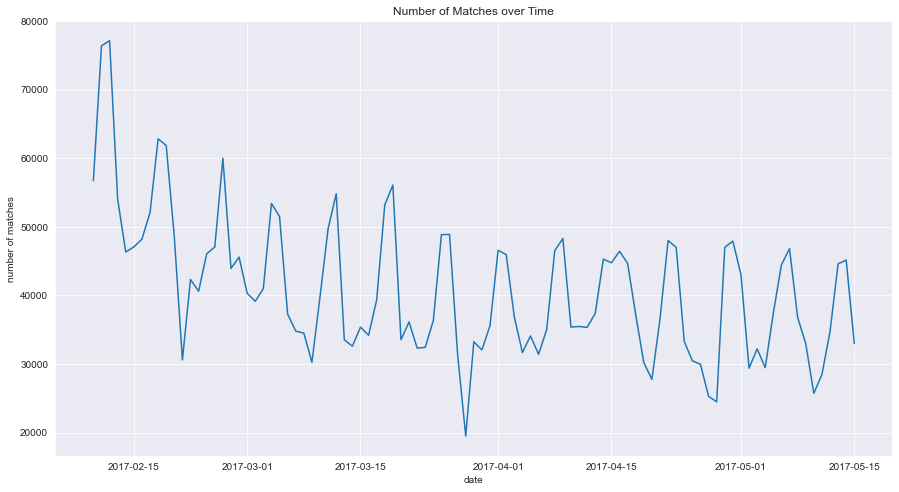

In [92]:
plt.figure(figsize=(15, 8))
sns.lineplot(data=df_plot_nbmatches, x="dateid", y="nbmatches", markers=True)
plt.title("Number of Matches over Time")
plt.xlabel("date")
plt.ylabel("number of matches")
# plt.savefig("plots/number_of_matcher_per_day.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [72]:
# df["weekday"] = df["dateid"].dt.day_name().astype("category")
df["weekday_numeric"] = df["dateid"].dt.weekday
# df_nbmatches_per_day = df.groupby("dateid", as_index=False)["matchid"].count().rename(columns={"matchid": "nbmatches"})
# df_nbmatches_per_day

In [76]:
df_weekday_plot = df.groupby("skillrank")["weekday_numeric"].value_counts().reset_index(name="nbmatches").rename(columns={"level_1": "weekday"})
df_weekday_plot

,skillrank,weekday_numeric,nbmatches
0,Bronze,6,71400
1,Bronze,5,66143
2,Bronze,0,53062
3,Bronze,4,51581
4,Bronze,2,44805
5,Bronze,1,44514
6,Bronze,3,42889
7,Copper,6,48815
8,Copper,5,46885
9,Copper,4,38709


<AxesSubplot:xlabel='weekday_numeric', ylabel='nbmatches'>

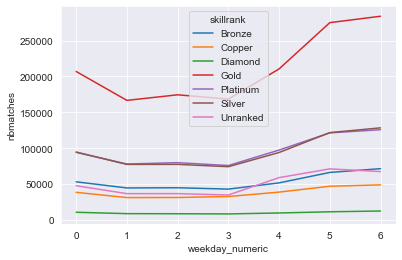

In [77]:
# for role, tbl in df_weekday_plot.groupby("skillrank"):
#     plt.figure(figsize=(15,8))
#     sns.pointplot(x="weekday", y="nbmatches", hue="skillrank", data=tbl,
#                   legend=False, size=5, aspect=2.5)
#     plt.legend(loc=9, bbox_to_anchor=(0.5, -0.2), ncol=5)
#     plt.title(role + ' Operators\' Win Rate Based on Rank')
#     plt.xlabel('Rank')
#     plt.ylabel('Win Ratio')
# plt.show()
# order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sns.lineplot(data=df_weekday_plot.sort_values(by="weekday_numeric"), x="weekday_numeric", y="nbmatches", hue="skillrank")

In [35]:
sns.lineplot(data=df, x="dateid", y=df["dateid"].nunique()

95

In [93]:
df_objectives = pd.read_csv("./data/datadump_s5_summary_objectives.csv", dtype={
    "dateid": "int64",
    "platform": "category",
    "gamemode": "category",
    "mapname": "category",
    "objectivelocation": "category",
    "skillrank": "category",
    "role": "category",
    "operator": "category",
    "nbkills": "int64",
    "nbwins": "int64",
    "nbdeaths": "int64",
    "nbpicks": "int64",
})
df_objectives.shape

(8785348, 12)

In [94]:
df_objectives.head()

,platform,dateid,gamemode,mapname,objectivelocation,skillrank,role,operator,nbwins,nbkills,nbdeaths,nbpicks
0,PC,20170210,BOMB,BANK,EXECUTIVE_LOUNGE-CEO_OFFICE,Bronze,Attacker,G.E.O.-JACKAL,0,0,1,1
1,PC,20170210,BOMB,BANK,EXECUTIVE_LOUNGE-CEO_OFFICE,Bronze,Attacker,GIGN-MONTAGNE,1,0,2,3
2,PC,20170210,BOMB,BANK,EXECUTIVE_LOUNGE-CEO_OFFICE,Bronze,Attacker,GSG9-IQ,0,0,1,1
3,PC,20170210,BOMB,BANK,EXECUTIVE_LOUNGE-CEO_OFFICE,Bronze,Attacker,JTF2-BUCK,0,0,1,1
4,PC,20170210,BOMB,BANK,EXECUTIVE_LOUNGE-CEO_OFFICE,Bronze,Attacker,SAS-THATCHER,0,0,1,1


In [97]:
print_size(df_objectives)

402.18 mb


In [98]:
df_map_operator = df_objectives.groupby(["mapname", "operator"], as_index=False)[['nbwins', 'nbkills', 'nbdeaths', 'nbpicks']].sum()
df_map_operator

,mapname,operator,nbwins,nbkills,nbdeaths,nbpicks
0,BANK,BOPE-CAPITAO,43342,59347,65445,90290
1,BANK,BOPE-CAVEIRA,142567,196837,193628,265097
2,BANK,G.E.O.-JACKAL,117301,179952,168240,239529
3,BANK,G.E.O.-MIRA,81676,99557,103303,153763
4,BANK,GIGN-DOC,78621,94073,102277,148859
...,...,...,...,...,...,...
555,YACHT,SWAT-ASH,184151,297372,250423,355660
556,YACHT,SWAT-CASTLE,52463,59472,77938,107544
557,YACHT,SWAT-PULSE,89467,125819,134204,180387
558,YACHT,SWAT-RESERVE,5476,6453,8757,11578


In [99]:
df_map_operator["win_ratio"] = df_map_operator["nbwins"] / df_map_operator["nbpicks"]
df_map_operator["kd_ratio"] = df_map_operator["nbkills"] / df_map_operator["nbdeaths"]
df_map_operator

,mapname,operator,nbwins,nbkills,nbdeaths,nbpicks,win_ratio,kd_ratio
0,BANK,BOPE-CAPITAO,43342,59347,65445,90290,0.480031,0.906823
1,BANK,BOPE-CAVEIRA,142567,196837,193628,265097,0.537792,1.016573
2,BANK,G.E.O.-JACKAL,117301,179952,168240,239529,0.489715,1.069615
3,BANK,G.E.O.-MIRA,81676,99557,103303,153763,0.531181,0.963738
4,BANK,GIGN-DOC,78621,94073,102277,148859,0.528158,0.919786
...,...,...,...,...,...,...,...,...
555,YACHT,SWAT-ASH,184151,297372,250423,355660,0.517773,1.187479
556,YACHT,SWAT-CASTLE,52463,59472,77938,107544,0.487828,0.763068
557,YACHT,SWAT-PULSE,89467,125819,134204,180387,0.495973,0.937520
558,YACHT,SWAT-RESERVE,5476,6453,8757,11578,0.472966,0.736896


In [100]:
df_map_role = df_objectives.groupby(["mapname", "role"], as_index=False)[['nbwins', 'nbkills', 'nbdeaths', 'nbpicks']].sum()
df_map_role["win_ratio"] = df_map_role["nbwins"] / df_map_role["nbpicks"]
df_map_role["kd_ratio"] = df_map_role["nbkills"] / df_map_role["nbdeaths"]
df_map_role

,mapname,role,nbwins,nbkills,nbdeaths,nbpicks,win_ratio,kd_ratio
0,BANK,Attacker,1291581,1887730,1870105,2675126,0.482811,1.009425
1,BANK,Defender,1447407,1864148,1896745,2699571,0.536162,0.982814
2,BARTLETT_U.,Attacker,1241273,1815176,1852964,2628860,0.472172,0.979607
3,BARTLETT_U.,Defender,1452915,1848806,1829067,2654339,0.547374,1.010792
4,BORDER,Attacker,1341549,1914519,1879312,2667897,0.502849,1.018734
5,BORDER,Defender,1387612,1874116,1929287,2692283,0.515403,0.971403
6,CHALET,Attacker,1477725,1999576,1794663,2694804,0.548361,1.114179
7,CHALET,Defender,1273391,1790878,2010119,2717417,0.468603,0.890931
8,CLUB_HOUSE,Attacker,1402386,1972144,1843063,2696048,0.520164,1.070036
9,CLUB_HOUSE,Defender,1351948,1837548,1979480,2718838,0.497252,0.928298


<AxesSubplot:xlabel='mapname', ylabel='role'>

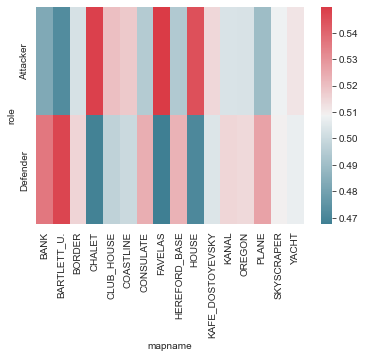

In [106]:
sns.heatmap(df_map_role.pivot(index="role", columns="mapname", values="win_ratio"), cmap=sns.diverging_palette(220,10, as_cmap=True))

In [9]:
df.groupby(["matchid", "roundnumber"])["winrole"].first().reset_index(name="winner_team")

KeyboardInterrupt: 

In [ ]:
df.head(1000).groupby(["matchid", "roundnumber"], as_index=False)["winrole"].first()

In [23]:
# df.groupby(["dateid", "matchid", "roundnumber", "team"])["operator"].apply(list).reset_index(name="operators")

KeyboardInterrupt: 